In [5]:
!git clone https://github.com/ultralytics/yolov5  # clone

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [9]:
cd yolov5 && pip install -r requirements.txt

[Errno 2] No such file or directory: 'deep_drowsiness_detection/yolov5 && pip install -r requirements.txt'
/home/kajetan/deep_drowsiness_detection


In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("GPU is available")
else:
    device = torch.device('cpu')
    print("GPU is not available")

GPU is available


In [2]:
print(torch.__version__)

2.1.2+cu121


In [15]:
import subprocess

version = subprocess.check_output(['nvcc', '--version']).decode('utf-8').strip()
print(f"PyTorch CUDA version: {version}")

PyTorch CUDA version: nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Fri_Jan__6_16:45:21_PST_2023
Cuda compilation tools, release 12.0, V12.0.140
Build cuda_12.0.r12.0/compiler.32267302_0


In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/kajetan/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-1-9 Python-3.11.5 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce GTX 1080, 8111MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
img = 'https://imgs.search.brave.com/STl275_7RYlTSagrJYIxOtsusnl5NN3yGPDYaUI_OQ0/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9pbWcu/ZnJlZXBpay5jb20v/ZnJlZS1waG90by9o/YXBweS1raWRzLWVs/ZW1lbnRhcnktc2No/b29sXzUzODc2LTEz/ODE0MS5qcGc_c2l6/ZT02MjYmZXh0PWpw/Zw'
results = model(img)
results.print()

image 1/1: 428x626 11 persons, 2 books
Speed: 182.6ms pre-process, 33.8ms inference, 16.5ms NMS per image at shape (1, 3, 448, 640)


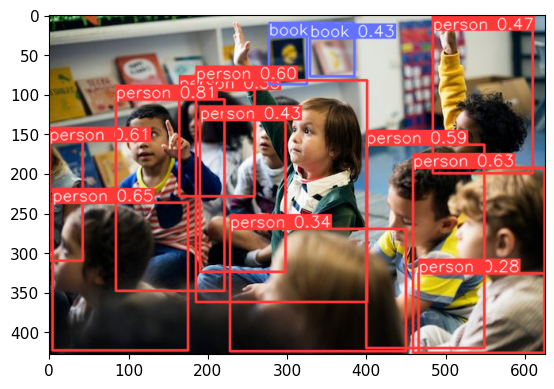

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
np.array(results.render()).shape

(1, 428, 626, 3)

In [ ]:
import cv2

def show_camera(mirror=False):
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        if mirror:
            frame = cv2.flip(frame, 1)

        cv2.imshow('YOLO', frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    show_camera(mirror=True)


QObject::moveToThread: Current thread (0x15f4050) is not the object's thread (0x1a4dc50).
Cannot move to target thread (0x15f4050)

QObject::moveToThread: Current thread (0x15f4050) is not the object's thread (0x1a4dc50).
Cannot move to target thread (0x15f4050)

QObject::moveToThread: Current thread (0x15f4050) is not the object's thread (0x1a4dc50).
Cannot move to target thread (0x15f4050)

QObject::moveToThread: Current thread (0x15f4050) is not the object's thread (0x1a4dc50).
Cannot move to target thread (0x15f4050)

QObject::moveToThread: Current thread (0x15f4050) is not the object's thread (0x1a4dc50).
Cannot move to target thread (0x15f4050)

QObject::moveToThread: Current thread (0x15f4050) is not the object's thread (0x1a4dc50).
Cannot move to target thread (0x15f4050)

QObject::moveToThread: Current thread (0x15f4050) is not the object's thread (0x1a4dc50).
Cannot move to target thread (0x15f4050)

QObject::moveToThread: Current thread (0x15f4050) is not the object's thread

## Real Time Detections

In [46]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()  # ret = boolean that indicates whether the currect frame wa succesfully read. Frame is used to access the frame data.

    cv2.imshow('YOLO', frame)

    if cv2.waitkey(10) & 0xFF == ord('q'):  
        break
cap.release()  # close a video capture object and release the associated resources
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x6b055cb0) is not the object's thread (0x6aee84a0).
Cannot move to target thread (0x6b055cb0)

QObject::moveToThread: Current thread (0x6b055cb0) is not the object's thread (0x6aee84a0).
Cannot move to target thread (0x6b055cb0)

QObject::moveToThread: Current thread (0x6b055cb0) is not the object's thread (0x6aee84a0).
Cannot move to target thread (0x6b055cb0)

QObject::moveToThread: Current thread (0x6b055cb0) is not the object's thread (0x6aee84a0).
Cannot move to target thread (0x6b055cb0)

QObject::moveToThread: Current thread (0x6b055cb0) is not the object's thread (0x6aee84a0).
Cannot move to target thread (0x6b055cb0)

QObject::moveToThread: Current thread (0x6b055cb0) is not the object's thread (0x6aee84a0).
Cannot move to target thread (0x6b055cb0)

QObject::moveToThread: Current thread (0x6b055cb0) is not the object's thread (0x6aee84a0).
Cannot move to target thread (0x6b055cb0)

QObject::moveToThread: Current thread (0x6b055cb0) is n

AttributeError: module 'cv2' has no attribute 'waitkey'